In [1]:
import pandas as pd
import numpy as np

In [130]:
# dataset link kaggle competitions download -c titanic

In [2]:
df_train = pd.read_csv("titanic train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# exploratory data analysis

In [132]:
df_train.shape

(891, 12)

In [133]:
df_train.size

10692

In [134]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [135]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [136]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [137]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [138]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [139]:
df_train["PassengerId"].value_counts()

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64

In [140]:
df_train["PassengerId"].nunique()

891

In [141]:
df_train["PassengerId"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [142]:
df_train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [143]:
df_train["Survived"].unique()

array([0, 1], dtype=int64)

In [144]:
df_train["Survived"].nunique()

2

In [145]:
df_train["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [146]:
df_train["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [147]:
df_train["Pclass"].nunique()

3

In [148]:
df_train["Name"].value_counts()

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

In [149]:
df_train["Name"].unique().tolist()

['Braund, Mr. Owen Harris',
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Heikkinen, Miss. Laina',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Allen, Mr. William Henry',
 'Moran, Mr. James',
 'McCarthy, Mr. Timothy J',
 'Palsson, Master. Gosta Leonard',
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 'Nasser, Mrs. Nicholas (Adele Achem)',
 'Sandstrom, Miss. Marguerite Rut',
 'Bonnell, Miss. Elizabeth',
 'Saundercock, Mr. William Henry',
 'Andersson, Mr. Anders Johan',
 'Vestrom, Miss. Hulda Amanda Adolfina',
 'Hewlett, Mrs. (Mary D Kingcome) ',
 'Rice, Master. Eugene',
 'Williams, Mr. Charles Eugene',
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
 'Masselmani, Mrs. Fatima',
 'Fynney, Mr. Joseph J',
 'Beesley, Mr. Lawrence',
 'McGowan, Miss. Anna "Annie"',
 'Sloper, Mr. William Thompson',
 'Palsson, Miss. Torborg Danira',
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 'Emir, Mr. Farred Chehab',
 'Fortune, Mr. Charles Alexander',
 '

In [150]:
df_train["Name"].nunique()

891

In [151]:
df_train["Sex"].value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

In [152]:
df_train["Sex"].unique()

array(['male', 'female'], dtype=object)

In [153]:
df_train["Sex"].nunique()

2

In [154]:
df_train["Age"].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [155]:
df_train["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [156]:
df_train["Age"].nunique()

88

In [157]:
df_train["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [158]:
df_train["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [159]:
df_train["SibSp"].nunique()

7

In [160]:
df_train["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [161]:
df_train["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [162]:
df_train["Parch"].nunique()

7

In [163]:
df_train["Ticket"].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [164]:
df_train["Ticket"].unique().tolist()

['A/5 21171',
 'PC 17599',
 'STON/O2. 3101282',
 '113803',
 '373450',
 '330877',
 '17463',
 '349909',
 '347742',
 '237736',
 'PP 9549',
 '113783',
 'A/5. 2151',
 '347082',
 '350406',
 '248706',
 '382652',
 '244373',
 '345763',
 '2649',
 '239865',
 '248698',
 '330923',
 '113788',
 '347077',
 '2631',
 '19950',
 '330959',
 '349216',
 'PC 17601',
 'PC 17569',
 '335677',
 'C.A. 24579',
 'PC 17604',
 '113789',
 '2677',
 'A./5. 2152',
 '345764',
 '2651',
 '7546',
 '11668',
 '349253',
 'SC/Paris 2123',
 '330958',
 'S.C./A.4. 23567',
 '370371',
 '14311',
 '2662',
 '349237',
 '3101295',
 'A/4. 39886',
 'PC 17572',
 '2926',
 '113509',
 '19947',
 'C.A. 31026',
 '2697',
 'C.A. 34651',
 'CA 2144',
 '2669',
 '113572',
 '36973',
 '347088',
 'PC 17605',
 '2661',
 'C.A. 29395',
 'S.P. 3464',
 '3101281',
 '315151',
 'C.A. 33111',
 'S.O.C. 14879',
 '2680',
 '1601',
 '348123',
 '349208',
 '374746',
 '248738',
 '364516',
 '345767',
 '345779',
 '330932',
 '113059',
 'SO/C 14885',
 '3101278',
 'W./C. 6608',
 

In [165]:
df_train["Ticket"].nunique()

681

In [166]:
df_train["Fare"].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [167]:
df_train["Fare"].unique().tolist()

[7.25,
 71.2833,
 7.925,
 53.1,
 8.05,
 8.4583,
 51.8625,
 21.075,
 11.1333,
 30.0708,
 16.7,
 26.55,
 31.275,
 7.8542,
 16.0,
 29.125,
 13.0,
 18.0,
 7.225,
 26.0,
 8.0292,
 35.5,
 31.3875,
 263.0,
 7.8792,
 7.8958,
 27.7208,
 146.5208,
 7.75,
 10.5,
 82.1708,
 52.0,
 7.2292,
 11.2417,
 9.475,
 21.0,
 41.5792,
 15.5,
 21.6792,
 17.8,
 39.6875,
 7.8,
 76.7292,
 61.9792,
 27.75,
 46.9,
 80.0,
 83.475,
 27.9,
 15.2458,
 8.1583,
 8.6625,
 73.5,
 14.4542,
 56.4958,
 7.65,
 29.0,
 12.475,
 9.0,
 9.5,
 7.7875,
 47.1,
 15.85,
 34.375,
 61.175,
 20.575,
 34.6542,
 63.3583,
 23.0,
 77.2875,
 8.6542,
 7.775,
 24.15,
 9.825,
 14.4583,
 247.5208,
 7.1417,
 22.3583,
 6.975,
 7.05,
 14.5,
 15.0458,
 26.2833,
 9.2167,
 79.2,
 6.75,
 11.5,
 36.75,
 7.7958,
 12.525,
 66.6,
 7.3125,
 61.3792,
 7.7333,
 69.55,
 16.1,
 15.75,
 20.525,
 55.0,
 25.925,
 33.5,
 30.6958,
 25.4667,
 28.7125,
 0.0,
 15.05,
 39.0,
 22.025,
 50.0,
 8.4042,
 6.4958,
 10.4625,
 18.7875,
 31.0,
 113.275,
 27.0,
 76.2917,
 90.0,
 9.3

In [168]:
df_train["Fare"].nunique()

248

In [169]:
df_train["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [170]:
df_train["Cabin"].unique().tolist()

[nan,
 'C85',
 'C123',
 'E46',
 'G6',
 'C103',
 'D56',
 'A6',
 'C23 C25 C27',
 'B78',
 'D33',
 'B30',
 'C52',
 'B28',
 'C83',
 'F33',
 'F G73',
 'E31',
 'A5',
 'D10 D12',
 'D26',
 'C110',
 'B58 B60',
 'E101',
 'F E69',
 'D47',
 'B86',
 'F2',
 'C2',
 'E33',
 'B19',
 'A7',
 'C49',
 'F4',
 'A32',
 'B4',
 'B80',
 'A31',
 'D36',
 'D15',
 'C93',
 'C78',
 'D35',
 'C87',
 'B77',
 'E67',
 'B94',
 'C125',
 'C99',
 'C118',
 'D7',
 'A19',
 'B49',
 'D',
 'C22 C26',
 'C106',
 'C65',
 'E36',
 'C54',
 'B57 B59 B63 B66',
 'C7',
 'E34',
 'C32',
 'B18',
 'C124',
 'C91',
 'E40',
 'T',
 'C128',
 'D37',
 'B35',
 'E50',
 'C82',
 'B96 B98',
 'E10',
 'E44',
 'A34',
 'C104',
 'C111',
 'C92',
 'E38',
 'D21',
 'E12',
 'E63',
 'A14',
 'B37',
 'C30',
 'D20',
 'B79',
 'E25',
 'D46',
 'B73',
 'C95',
 'B38',
 'B39',
 'B22',
 'C86',
 'C70',
 'A16',
 'C101',
 'C68',
 'A10',
 'E68',
 'B41',
 'A20',
 'D19',
 'D50',
 'D9',
 'A23',
 'B50',
 'A26',
 'D48',
 'E58',
 'C126',
 'B71',
 'B51 B53 B55',
 'D49',
 'B5',
 'B20',
 'F G

In [171]:
df_train["Cabin"].nunique()

147

In [172]:
df_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [173]:
df_train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [174]:
df_train["Embarked"].nunique()

3

In [175]:
df_train.isnull().sum()/len(df_train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [176]:
df_train.duplicated().sum()

0

In [177]:
df_train.value_counts().sum()

183

In [178]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [179]:
x = df_train[["PassengerId","Survived","Pclass","SibSp","Parch"]]
y = df_train[["Age","Fare"]]
z = df_train[["Cabin","Embarked","Ticket","Sex","Name"]]

In [180]:
x

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0
...,...,...,...,...,...
886,887,0,2,0,0
887,888,1,1,0,0
888,889,0,3,1,2
889,890,1,1,0,0


In [181]:
y

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [182]:
z

,Cabin,Embarked,Ticket,Sex,Name
0,NaN,S,A/5 21171,male,"Braund, Mr. Owen Harris"
1,C85,C,PC 17599,female,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,NaN,S,STON/O2. 3101282,female,"Heikkinen, Miss. Laina"
3,C123,S,113803,female,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,NaN,S,373450,male,"Allen, Mr. William Henry"
...,...,...,...,...,...
886,NaN,S,211536,male,"Montvila, Rev. Juozas"
887,B42,S,112053,female,"Graham, Miss. Margaret Edith"
888,NaN,S,W./C. 6607,female,"Johnston, Miss. Catherine Helen ""Carrie"""
889,C148,C,111369,male,"Behr, Mr. Karl Howell"


In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
#for i in x:
    #sns.barplot(x[i])
    #plt.show()
    #plt.title(i)

In [185]:
#for i in z:
    #sns.boxplot(z[i])
    #plt.title(i)
   # plt.show()

In [186]:
x.corr()

,PassengerId,Survived,Pclass,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,0.083081,0.018443
SibSp,-0.057527,-0.035322,0.083081,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,0.414838,1.000000


In [187]:
y.corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


In [188]:
#sns.heatmap(x,annot = True)
#plt.show()

In [189]:
#sns.pairplot(x)
#plt.show()

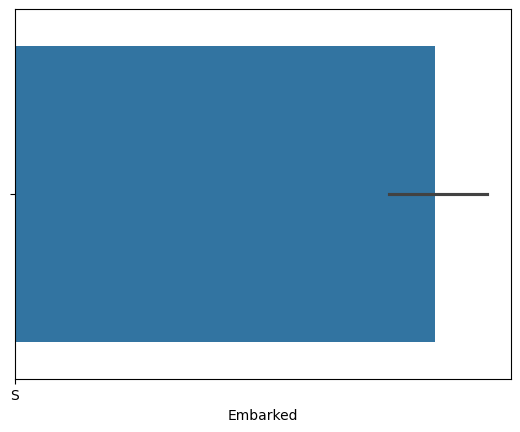

In [190]:
sns.barplot(x=df_train["Embarked"])
plt.show()


In [191]:
df_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

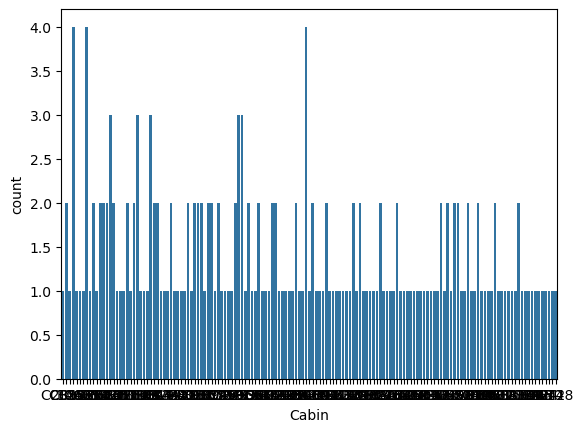

In [192]:
sns.countplot(x=df_train["Cabin"])
plt.show()

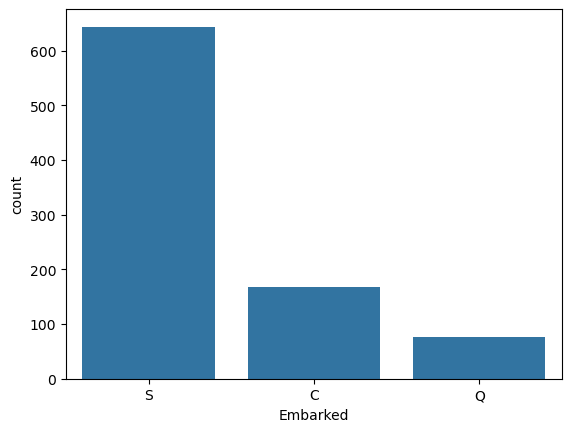

In [193]:
sns.countplot(x=df_train["Embarked"])
plt.show()

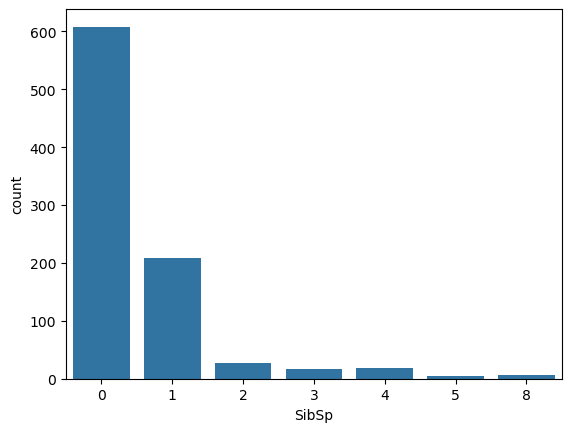

In [194]:
sns.countplot(x=df_train["SibSp"])
plt.show()

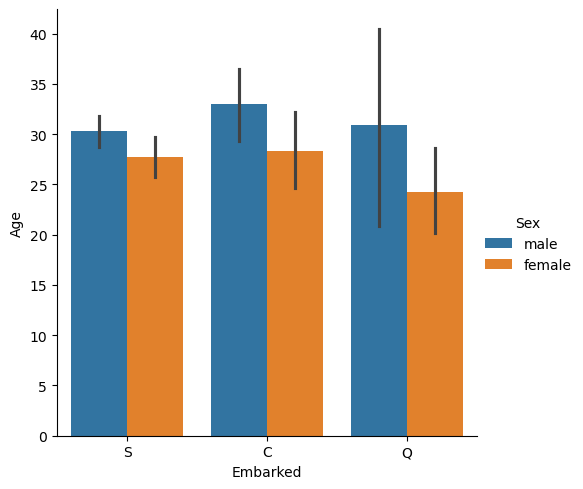

In [195]:
sns.catplot(x=df_train["Embarked"],y=df_train["Age"],hue=df_train["Sex"],kind="bar")
plt.show()

In [196]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

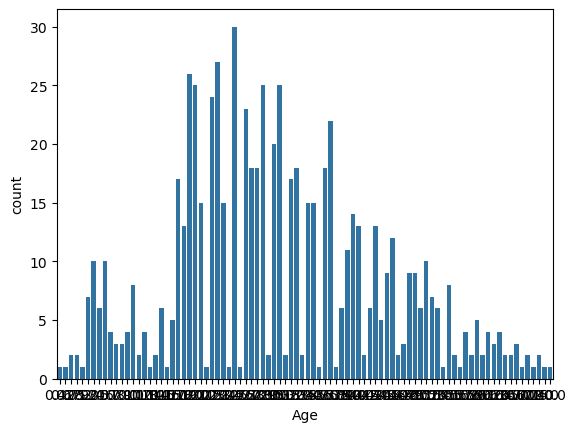

In [197]:
sns.countplot(x=df_train["Age"])
plt.show()

In [198]:
df_train["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

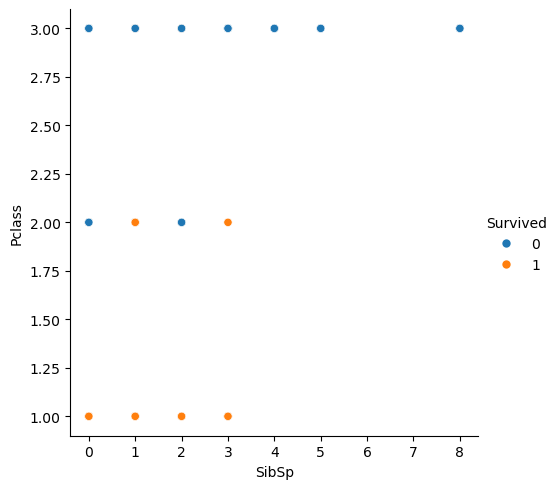

In [199]:
sns.relplot(x=df_train["SibSp"],y=df_train["Pclass"],hue =df_train["Survived"])
plt.show()

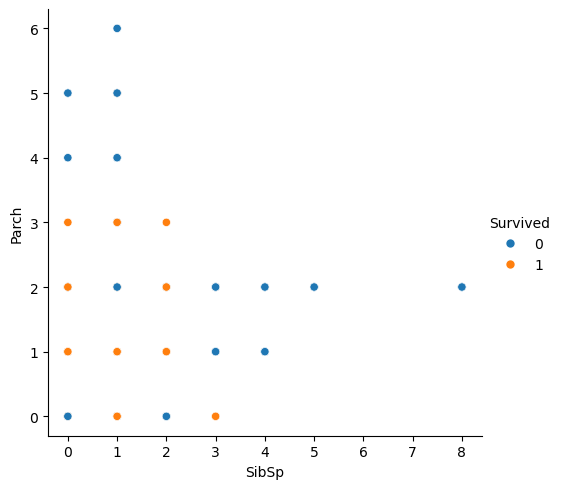

In [200]:
sns.relplot(x=df_train["SibSp"],y=df_train["Parch"],hue = df_train["Survived"])
plt.show()

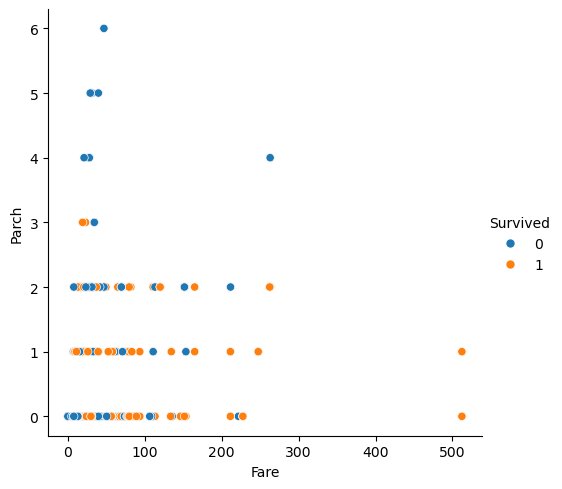

In [201]:
sns.relplot(x=df_train["Fare"],y=df_train["Parch"],hue = df_train["Survived"])
plt.show()

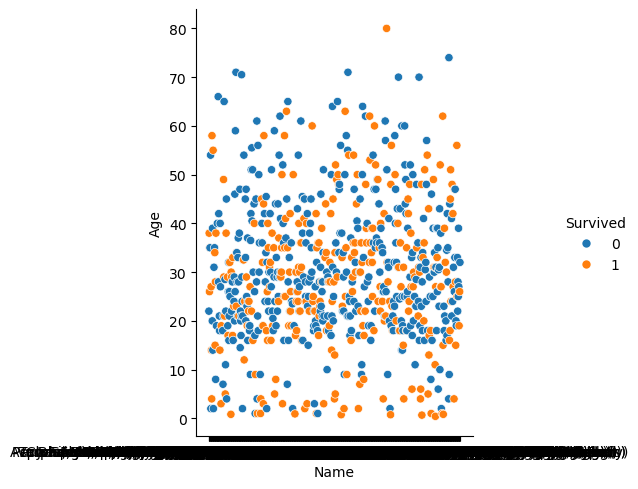

In [202]:
sns.relplot(x=df_train["Name"],y=df_train["Age"],hue = df_train["Survived"])
plt.show()

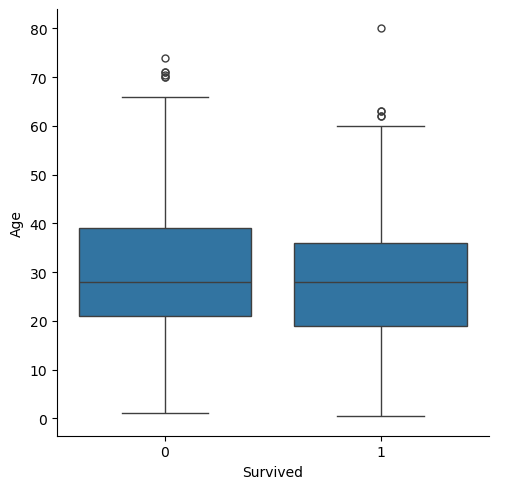

In [203]:
sns.catplot(x=df_train["Survived"],y=df_train["Age"],data=df_train,kind = "box")
plt.show()

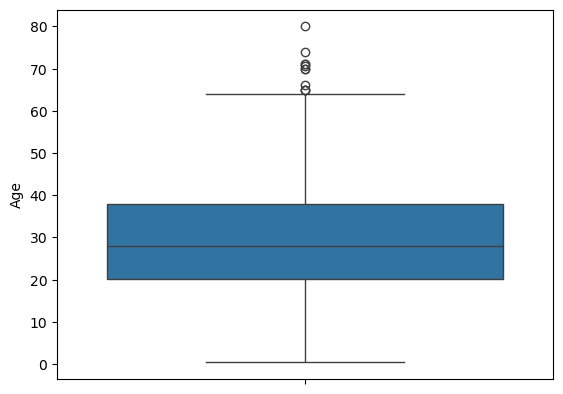

In [204]:
sns.boxplot(y=df_train["Age"])
plt.show()

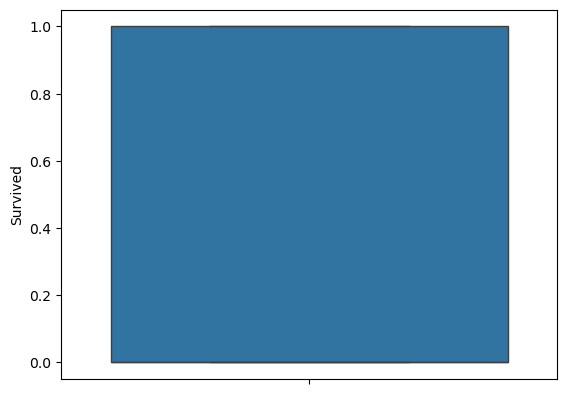

In [205]:
sns.boxplot(y=df_train["Survived"])
plt.show()

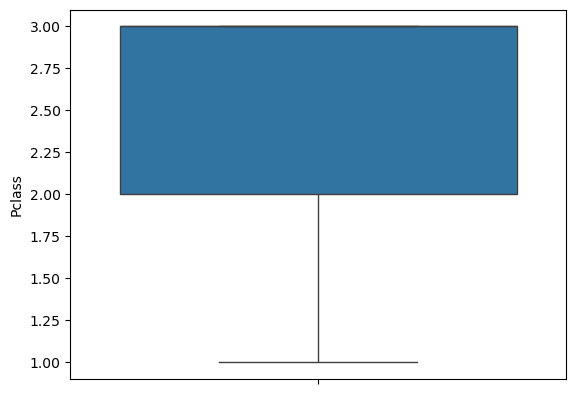

In [206]:
sns.boxplot(y=df_train["Pclass"])
plt.show()

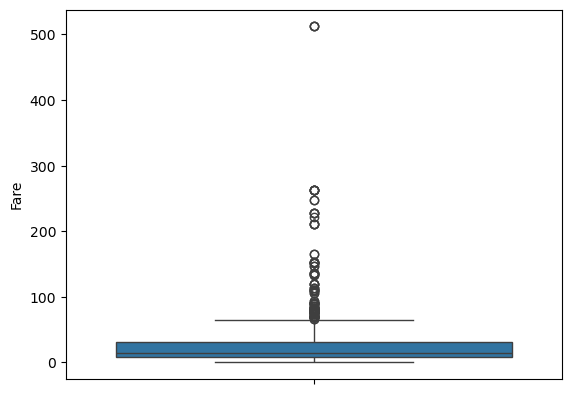

In [207]:
sns.boxplot(y=df_train["Fare"])
plt.show()

In [209]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# featues selection

In [210]:
df_train.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace = True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# data preprocesssing 

In [211]:
# data clearing 
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [212]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [213]:
df_train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# checking the dataset is balanced or imbalanced

In [87]:
print("549/342:",549/342)     #value is in between the >1 and <=2 is consider as the balanced dataset

549/342: 1.605263157894737


# wrong data types

In [214]:
df_train.dtypes


Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [215]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# wrong values

In [216]:
df_train.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [217]:
df_train["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [218]:
df_train[df_train["Age"]<1] =1
df_train["Age"].unique().astype(float)

array([22. , 38. , 26. , 35. ,  nan, 54. ,  2. , 27. , 14. ,  4. , 58. ,
       20. , 39. , 55. , 31. , 34. , 15. , 28. ,  8. , 19. , 40. , 66. ,
       42. , 21. , 18. ,  3. ,  7. , 49. , 29. , 65. , 28.5,  5. , 11. ,
       45. , 17. , 32. , 16. , 25. ,  1. , 30. , 33. , 23. , 24. , 46. ,
       59. , 71. , 37. , 47. , 14.5, 70.5, 32.5, 12. ,  9. , 36.5, 51. ,
       55.5, 40.5, 44. , 61. , 56. , 50. , 36. , 45.5, 20.5, 62. , 41. ,
       52. , 63. , 23.5, 43. , 60. , 10. , 64. , 13. , 48. , 53. , 57. ,
       80. , 70. , 24.5,  6. , 30.5, 34.5, 74. ])

In [219]:
df_train["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

# dealing with the duplicates

In [220]:
df_train.duplicated().sum()

116

In [221]:
df_train[df_train.duplicated()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
47,1,3,female,NaN,0,0,7.7500,Q
76,0,3,male,NaN,0,0,7.8958,S
77,0,3,male,NaN,0,0,8.0500,S
87,0,3,male,NaN,0,0,8.0500,S
95,0,3,male,NaN,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S
877,0,3,male,19.0,0,0,7.8958,S
878,0,3,male,NaN,0,0,7.8958,S
884,0,3,male,25.0,0,0,7.0500,S


In [222]:
df_train[~df_train.duplicated()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [223]:
df_train.duplicated().sum()

116

# dealing with the null values

In [98]:
# df_train.isnull().sum()

In [224]:
df_train.isnull()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False
889,False,False,False,False,False,False,False,False


In [225]:
df_train.isnull().sum()/len(df_train) * 100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

In [226]:
df_train["Age"].isnull().sum()

177

In [227]:
df_train["Age"].max()

80.0

In [228]:
df_train["Age"].mean()

29.701680672268907

In [230]:
 df_train["Age"] = df_train["Age"].interpolate(method="linear")

In [232]:
df_train["Age"].isnull().sum()

0

In [233]:
# df_train["Age"].fillna(30.02)

In [234]:
df_train["Embarked"].mode()


0    S
Name: Embarked, dtype: object

In [237]:
df_train["Embarked"].fillna("S")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [108]:
# df_train.dropna(inplace  = True)

In [241]:
df_train["Embarked"].unique()


array(['S', 'C', 'Q', nan, 1], dtype=object)

In [246]:
df_train[df_train["Embarked"] == "nan"]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [238]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [254]:
df_train["Fare"].mean()

31.91932210998878

In [110]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [111]:
#df_train.to_csv("titanic_cleaned.csv",index = False)

# dealing with the outliers

In [112]:
# there are no outliers to drop 

# data wrangling 

In [113]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [114]:
df_train["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
885    female
886      male
887    female
889      male
890      male
Name: Sex, Length: 712, dtype: object

In [253]:
df_train[df_train["Sex"]==1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [116]:
df_train["Sex"].unique()

array(['male', 'female', 1], dtype=object)

In [250]:
df_train= df_train.drop(index = [78,305,469,644,755,803,831],inplace  = True)

In [251]:
df_train['Sex'].astype(str)

0      None
1      None
2      None
3      None
4      None
       ... 
886    None
887    None
888    None
889    None
890    None
Name: Sex, Length: 891, dtype: object

In [252]:
df_train["Sex"].unique()

array([None], dtype=object)

In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train["Sex_le"] = le.fit_transform(df_train["Sex"])
df_train.head(15)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_le
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1
6,0,1,male,54.0,0,0,51.8625,S,1
7,0,3,male,2.0,3,1,21.0750,S,1
8,1,3,female,27.0,0,2,11.1333,S,0
9,1,2,female,14.0,1,0,30.0708,C,0
10,1,3,female,4.0,1,1,16.7000,S,0


In [121]:
df_train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_train["Embarked_le"] = le.fit_transform(df_train["Embarked"])
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_le,Embarked_le
0,0,3,male,22.0,1,0,7.2500,S,1,2
1,1,1,female,38.0,1,0,71.2833,C,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,2
3,1,1,female,35.0,1,0,53.1000,S,0,2
4,0,3,male,35.0,0,0,8.0500,S,1,2
6,0,1,male,54.0,0,0,51.8625,S,1,2
7,0,3,male,2.0,3,1,21.0750,S,1,2
8,1,3,female,27.0,0,2,11.1333,S,0,2
9,1,2,female,14.0,1,0,30.0708,C,0,0
10,1,3,female,4.0,1,1,16.7000,S,0,2


In [123]:
df_train = df_train.drop(columns = ["Sex","Embarked"])

# dimensional reducation

In [124]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

In [125]:
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_le,Embarked_le
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2
...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,1
886,0,2,27.0,0,0,13.0000,1,2
887,1,1,19.0,0,0,30.0000,0,2
889,1,1,26.0,0,0,30.0000,1,0


In [126]:
df_train.to_csv("cleaned_u.csv",index = False)